In [1]:
# Importing Libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as non_clustered_plt
import matplotlib.pyplot as clustered_plt
import matplotlib.pyplot as clustering_error_plt

In [2]:
# Importing Data
df = pd.read_csv('Mall_customers.csv')

In [3]:
# Data
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Data Shape
df.shape

(200, 5)

In [5]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Using only relevant columns
X_3d = df.iloc[:, 2:]
X_2d = df.iloc[:, [3, 4]]

In [7]:
# Finalized Data for 3D Plot
X_3d.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
# Finalized Data for 2D Plot
X_2d.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


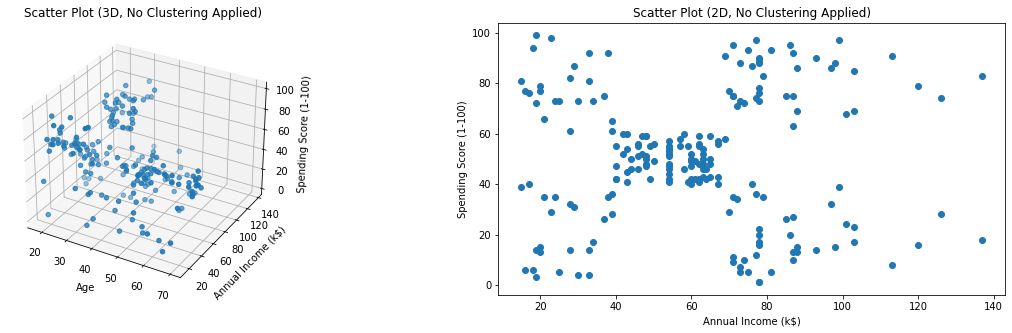

In [9]:
# Intializing Data Scatter Plot
fig = non_clustered_plt.figure(figsize=(20, 5))

# Plotting Data Points in 3D plot
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_3d.iloc[:, 0].values, X_3d.iloc[:, 1].values, X_3d.iloc[:, 2].values)
ax.set_title('Scatter Plot (3D, No Clustering Applied)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Plotting Data Points in 2D plot
ax = fig.add_subplot(122)
ax.scatter(X_2d.iloc[:, 0].values, X_2d.iloc[:, 1].values)
ax.set_title('Scatter Plot (2D, No Clustering Applied)')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')

# Scatter Plot
non_clustered_plt.show()

In [10]:
# K Means Clustering
wcss_3d = []
wcss_2d = []
n = 31
for i in range(1, n):
    kmeans_3d = KMeans(n_clusters=i, init='k-means++')
    kmeans_2d = KMeans(n_clusters=i, init='k-means++')
    kmeans_3d.fit(X_3d)
    kmeans_2d.fit(X_2d)
    wcss_3d.append(kmeans_3d.inertia_)
    wcss_2d.append(kmeans_2d.inertia_)

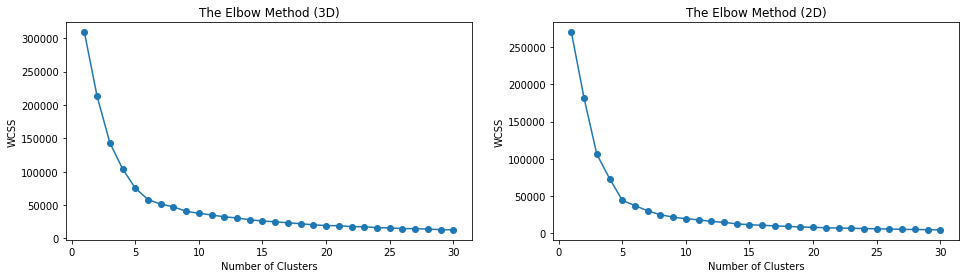

In [11]:
# Initializing Error Plot
fig = clustering_error_plt.figure(figsize=(16, 4))

# 3D
ax = fig.add_subplot(121)
ax.scatter(range(1, n), wcss_3d)
ax.plot(range(1, n), wcss_3d)
ax.set_title('The Elbow Method (3D)')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('WCSS')

# 2D
ax = fig.add_subplot(122)
ax.scatter(range(1, n), wcss_2d)
ax.plot(range(1, n), wcss_2d)
ax.set_title('The Elbow Method (2D)')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('WCSS')

# Error Plot
clustering_error_plt.show()

##### Best Optimal Number of Clusters for
- 3D is 6
- 2D is 4

In [12]:
# Applying K Means with correct Number of Clusters
kmeans_3d = KMeans(n_clusters=6, init='k-means++')
kmeans_2d = KMeans(n_clusters=5, init='k-means++')

# Fitting and Clustering
y_3d = kmeans_3d.fit_predict(X_3d)
y_2d = kmeans_2d.fit_predict(X_2d)

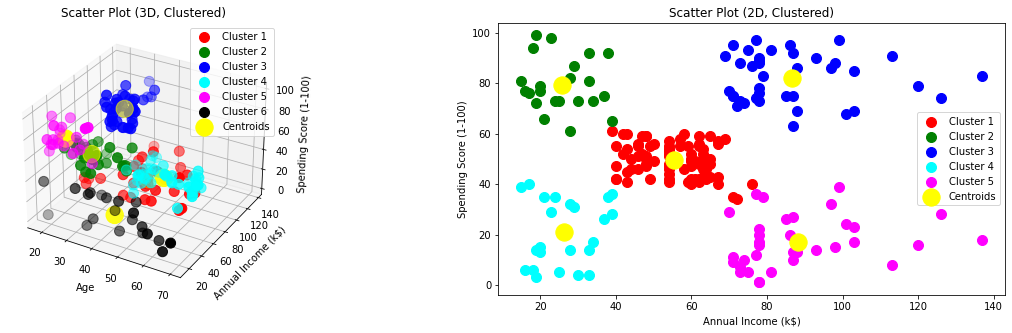

In [13]:
# Initializing Clustered Plot
fig = clustered_plt.figure(figsize=(20, 5))

# 3D
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_3d.iloc[y_3d==0, 0], X_3d.iloc[y_3d==0, 1], X_3d.iloc[y_3d==0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(X_3d.iloc[y_3d==1, 0], X_3d.iloc[y_3d==1, 1], X_3d.iloc[y_3d==1, 2], s=100, c='green', label='Cluster 2')
ax.scatter(X_3d.iloc[y_3d==2, 0], X_3d.iloc[y_3d==2, 1], X_3d.iloc[y_3d==2, 2], s=100, c='blue', label='Cluster 3')
ax.scatter(X_3d.iloc[y_3d==3, 0], X_3d.iloc[y_3d==3, 1], X_3d.iloc[y_3d==3, 2], s=100, c='cyan', label='Cluster 4')
ax.scatter(X_3d.iloc[y_3d==4, 0], X_3d.iloc[y_3d==4, 1], X_3d.iloc[y_3d==4, 2], s=100, c='magenta', label='Cluster 5')
ax.scatter(X_3d.iloc[y_3d==5, 0], X_3d.iloc[y_3d==5, 1], X_3d.iloc[y_3d==5, 2], s=100, c='black', label='Cluster 6')
ax.scatter(kmeans_3d.cluster_centers_[:, 0], kmeans_3d.cluster_centers_[:, 1], kmeans_3d.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
ax.set_title('Scatter Plot (3D, Clustered)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()

# 2D
ax = fig.add_subplot(122)
ax.scatter(X_2d.iloc[y_2d==0, 0], X_2d.iloc[y_2d==0, 1], s=100, c='red', label='Cluster 1')
ax.scatter(X_2d.iloc[y_2d==1, 0], X_2d.iloc[y_2d==1, 1], s=100, c='green', label='Cluster 2')
ax.scatter(X_2d.iloc[y_2d==2, 0], X_2d.iloc[y_2d==2, 1], s=100, c='blue', label='Cluster 3')
ax.scatter(X_2d.iloc[y_2d==3, 0], X_2d.iloc[y_2d==3, 1], s=100, c='cyan', label='Cluster 4')
ax.scatter(X_2d.iloc[y_2d==4, 0], X_2d.iloc[y_2d==4, 1], s=100, c='magenta', label='Cluster 5')
ax.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
ax.set_title('Scatter Plot (2D, Clustered)')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.legend()

# Scatter Plot
clustered_plt.show()